# Advanced Programme in Deep Learning (Foundations and Applications)
## A Program by IISc and TalentSprint
### Assignment: Implementation of Denoising Diffusion Probabilistic Models (DDPM)

## Learning Objectives

At the end of the experiment, you will be able to :

* understand diffusion models
* implement Denoising Diffusion Probabilistic Models (DDPM)

## Dataset



### Description


1. The dataset contains 60,000 Handwritten digits as training samples and 10,000 Test samples,
which means each digit occurs 6000 times in the training set and 1000 times in the testing set. (approximately).
2. Each image is Size Normalized and Centered
3. Each image is 28 X 28 Pixel with 0-255 Gray Scale Value.
4. That means each image is represented as 784 (28 X28) dimension vector where each value is in the range 0- 255.


### History

Yann LeCun (Director of AI Research, Facebook, Courant Institute, NYU) was given the task of identifying the cheque numbers (in the 90’s) and the amount associated with that cheque without manual intervention. That is when this dataset was created which raised the bars and became a benchmark.

Yann LeCun and Corinna Cortes (Google Labs, New York) hold the copyright of MNIST dataset, which is a subset of the original NIST datasets. This dataset is made available under the terms of the Creative Commons Attribution-Share Alike 3.0 license.

It is the handwritten digits dataset in which half of them are written by the Census Bureau employees and remaining by the high school students. The digits collected among the Census Bureau employees are easier and cleaner to recognize than the digits collected among the students.

## Domain Information



Handwriting changes person to person. Some of us have neat handwriting and some have illegible handwriting such as doctors. However, if you think about it even a child who recognizes alphabets and numerics can identify the characters of a text even written by a stranger. But even a technically knowledgeable adult cannot describe the process by which he or she recognizes the text/letters. As you know this is an excellent challenge for Machine Learning.

![altxt](https://i.pinimg.com/originals/f2/7a/ac/f27aac4542c0090872110836d65f4c99.jpg)



## Information

### Introduction

Generative models create latent representations, which distil information from big data in order to generate realistic and novel data points.  GAN, VAE models have shown great success in generating high-quality samples, but each has some limitations of its own. GAN models are known for potentially unstable training and less diversity in generation due to their adversarial training nature. VAE relies on a loss function.

There is another set of techniques which originate from probabilistic likelihood estimation methods and take inspiration from physical phenomenon; it is called, **Diffusion Models**. The central idea behind Diffusion Models comes from the thermodynamics of gas molecules whereby the molecules diffuse from high density to low density areas. This movement is often referred in physics literature as the increase of entropy or heat death. In information theory, this equates to loss of information due to gradual intervention of noise.


The key concept in Diffusion Modelling is that if we could build a learning model which can learn the systematic decay of information due to noise, then it should be possible to reverse the process and therefore, recover the information back from the noise. This concept is similar to VAEs in the way that it tries to optimize an objective function by first projecting the data onto the latent space and then recovering it back to the initial state. However, instead of learning the data distribution, the system aims to model a series of noise distributions in a **Markov Chain** and **“decodes”** the data by **undoing/denoising** the data in a hierarchical fashion.

<center>
<img src="https://lilianweng.github.io/posts/2021-07-11-diffusion-models/generative-overview.png" width=600px/>
</center>


### What is Diffusion(Denoising) Model?

The idea of denoising diffusion model has been around for a long time. It has its roots in Diffusion Maps concept which is one of the dimensionality reduction techniques used in Machine Learning literature. It also borrows concepts from the probabilistic methods such as Markov Chains which has been used in many applications.

A denoising diffusion modeling is a two step process: the **forward diffusion process** and the **reverse process** or the reconstruction.

 * In the forward diffusion process $q$, gaussian noise is introduced successively until the data becomes all noise.

 * The reverse/ reconstruction process $p_{θ}$, undoes the noise by learning the conditional probability densities using a neural network model

Both the forward and reverse process indexed by $t$ happen for some number of finite time steps $T$ (the DDPM authors use T=1000). We start with $t=0$ where we sample a real image $x_{0}$ from your data distribution (let's say an image of a celebrity from CelebA dataset), and the forward process samples some noise from a Gaussian distribution at each time step $t$, which is added to the image of the previous time step. Given a sufficiently large $T$ and a well behaved schedule for adding noise at each time step, we end up with what is called an isotropic Gaussian distribution at $t=T$ via a gradual process.



### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2236974" #@param {type:"string"}

In [2]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "7259357831" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

ipython = get_ipython()

notebook= "M4_AST_36_Denoising_Diffusion_Probabilistic_Model_MNIST_C" #name of the notebook

def setup():
    ipython.magic("sx wget https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/mnist_model.pth")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer1() and getAnswer2() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer1" : Answer1, "answer2" : Answer2, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://dlfa-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer1():
  try:
    if not Answer1:
      raise NameError
    else:
      return Answer1
  except NameError:
    print ("Please answer Question 1")
    return None

def getAnswer2():
  try:
    if not Answer2:
      raise NameError
    else:
      return Answer2
  except NameError:
    print ("Please answer Question 2")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Importing required packages

In [4]:
import math
import pickle
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
from torchvision import transforms, datasets
from torch.utils.data.dataloader import DataLoader
import torch.nn.functional as F

### Initializing CUDA

CUDA is used as an interface between our code and the GPU.

Normally, we run the code in the CPU. To run it in the GPU, we need CUDA. Check if CUDA is available:

In [5]:
# To test whether GPU instance is present in the system of not.
use_cuda = torch.cuda.is_available()
print('Using PyTorch version:', torch.__version__, 'CUDA:', use_cuda)

Using PyTorch version: 2.0.1+cu118 CUDA: True


If it's False, then we run the program on CPU. If it's True, then we run the program on GPU.

Let us initialize some GPU-related variables:

In [6]:
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cuda


### Load MNIST data

Now, we'll load the MNIST data. For the first time, we may have to download the data, which can take a while.

Now,

* We will load both the training set and the testing sets

* We will use  transform.compose() to convert the datasets into tensors using transforms.ToTensor(). We also normalize them by setting the mean and standard deviation using transforms.Normalize().


In [7]:
IMG_SIZE = 32
BATCH_SIZE = 128

In [8]:
# Define transformations
transform = transforms.Compose([transforms.Resize((IMG_SIZE, IMG_SIZE)), # Resizes image
                                transforms.ToTensor(), # Scales data to [0,1]
                                transforms.Lambda(lambda x: (x * 2) - 1)]) # Rescale data to [-1, 1] range

In [9]:
# Loading the train and set file
train_dataset = datasets.MNIST('../data', train=True, transform=transform, download=True) # 60000 images
test_dataset = datasets.MNIST('../data', train=False, transform=transform, download=True) # 10000 images

# Subset of dataset
# train = torch.utils.data.Subset(train, indices=range(len(train)//100))
# test =torch.utils.data. Subset(test, indices=range(len(test)//100))

# Combining train and test sets
data = torch.utils.data.ConcatDataset([train_dataset, test_dataset])

100%|██████████| 9912422/9912422 [00:00<00:00, 125882483.16it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 39139157.94it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 28449921.41it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 6098120.60it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



In [10]:
# Number of training samples
len(train_dataset)

60000

In [11]:
# Size of one training image
train_dataset[0][0].size()

torch.Size([1, 32, 32])



**torch.utils.data.DataLoader** class represents a Python iterable over a dataset, with following features.

1. Batching the data
2. Shuffling the data
3. Load the data in parallel using multiprocessing workers.


The batches of train and test data are provided via data loaders that provide iterators over the datasets to train our models.

In [12]:
data_loader = DataLoader(data, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
print(len(data_loader))

546


The train and test data are provided via data loaders that provide iterators over the datasets.

The first element of training data (X_train) is a 4th-order tensor of size (batch_size, 1, 28, 28), i.e. it consists of a batch of images of size 1x28x28 pixels where '1' represents one input image channel i.e. grey scale. y_train is a vector containing the correct classes ("0", "1", ..., "9") for each training digit.

In [13]:
for (X_train, y_train) in data_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

X_train: torch.Size([128, 1, 32, 32]) type: torch.FloatTensor
y_train: torch.Size([128]) type: torch.LongTensor


#### Plotting the  first 10 training digit images

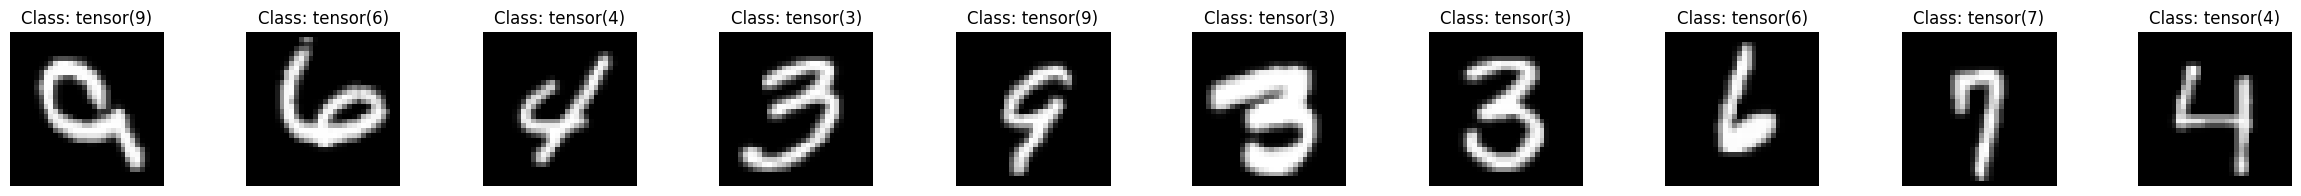

In [14]:
pltsize=2
plt.figure(figsize=(15*pltsize, pltsize))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')

    plt.imshow(X_train[i,:,:,:].numpy().reshape(32,32), cmap="gray")
    plt.title('Class: '+str(y_train[i]))

### Building the Diffusion Model


The basic idea behind diffusion models is rather simple. They take the input image $\mathbf{x}_0$ and gradually add Gaussian noise to it through a series of $T$ steps. We will call this the forward process. Notably, this is unrelated to the forward pass of a neural network. This part is necessary to generate the targets for our neural network (the image after applying $t<T$ noise steps).

Afterward, a neural network is trained to recover the original data by reversing the noising process. By being able to model the reverse process, we can generate new data. This is the so-called reverse diffusion process or, in general, the sampling process of a generative model.

#### Step 1: The forward difussion process = Noise scheduler

We first need to build the inputs for our model, which are more and more noisy images. Instead of doing this sequentially, we can use the closed form provided in the papers to calculate the image for any of the timesteps individually.

<center>
<img src="https://theaisummer.com/static/1f5f940d6d3f1e00b3777066f6695331/073e9/forward-diffusion.png" width=650px/>
</center>
<br>

**In more mathematical form**

We can formally define the forward diffusion process as a Markov Chain
of $T$ steps. Here, a Markov chain means that each step only depends on the previous one, which is a mild assumption and therefore, unlike an encoder in the VAEs it doesn’t require a training.

Let $q(x_{0})$ be the real data distribution, say of "real images". We can sample from this distribution to get an image, $x_{0} ∼ q(x_{0})$. We define the forward diffusion process $q(x_{t}∣x_{t−1})$ which adds Gaussian noise at each time step $t$, according to a known variance schedule $0 < β_{1} <β_{2} <...<β_{T}​<1$  and $x_{t-1}$ is the previous less noise image which means the mean of our distribution is exactly the previous image multiplied with this term that depends on the variance schedule $β$, the variance of this normal distribution is fixed to $β$ multiplied with identity $I$ as

<br>
<center>
$\quad q(\mathbf{x}_t \vert \mathbf{x}_{t-1}) = \mathcal{N}(\mathbf{x}_t; \sqrt{1 - \beta_t} \mathbf{x}_{t-1}, \beta_t\mathbf{I})$
</center>
<br>

Recall that a normal distribution (also called Gaussian distribution) is defined by 2 parameters: a mean $μ$ and a variance $σ^{2}≥ 0$. Basically, each new (slightly noisier) image at time step $t$ is drawn from a **conditional Gaussian distribution** with mean $μ_{t} = \sqrt{1−β_{t}}x_{t−1}$​
​and variance $σ_{t}^2 = β_{t}$ ​, which we can do by sampling $ϵ∼N(0,I)$ and then setting $x_{t}=\sqrt{1−β_{t}}x_{t−1} + \sqrt{β_{t}}​ϵ$​.


Note that the $β_{t}$​ aren't constant at each time step $t$  --- in fact one defines a so-called "variance schedule", which can be linear, quadratic, cosine, etc. as we will see further (a bit like a learning rate schedule).

So starting from $x_{0}$​, we end up with $x_{1}$,...,$x_{t}$,...,$x_{T}$, where $x_{T}$​ is pure Gaussian noise if we set the schedule appropriately.


So we need a neural network to represent a (conditional) probability distribution of the backward process. If we assume this reverse process is Gaussian as well, then recall that any Gaussian distribution is defined by 2 parameters:
* a mean parametrized by \\(\mu_\theta\\);
* a variance parametrized by \\(\Sigma_\theta\\);

so we can parametrize the process as :
<center>
$$ p_\theta (\mathbf{x}_{t-1} | \mathbf{x}_t) = \mathcal{N}(\mathbf{x}_{t-1}; \mu_\theta(\mathbf{x}_{t},t), \Sigma_\theta (\mathbf{x}_{t},t))$$
</center>
<br>
where the mean and variance are also conditioned on the noise level \\(t\\).


Hence, our neural network needs to learn/represent the mean and variance. However, the DDPM authors decided to **keep the variance fixed, and let the neural network only learn (represent) the mean \\(\mu_\theta\\) of this conditional probability distribution**. From the paper:

> First, we set \\(\Sigma_\theta ( \mathbf{x}_t, t) = \sigma^2_t \mathbf{I}\\) to untrained time dependent constants. Experimentally, both \\(\sigma^2_t = \beta_t\\) and \\(\sigma^2_t  = \tilde{\beta}_t\\) (see paper) had similar results.

So we continue, assuming that our neural network only needs to learn/represent the mean of this conditional probability distribution.







**Note:**

1. Refer to the folowing [paper](https://arxiv.org/pdf/2006.11239.pdf) to understand more about the diffusion models.

2. Refer to the following [paper](https://arxiv.org/pdf/2208.11970.pdf) for Understanding Diffusion Models.

#### Defining an objective function (by reparametrizing the mean)


To derive an objective function to learn the mean of the backward process, the authors observe that the combination of \\(q\\) and \\(p_\theta\\) can be seen as a variational auto-encoder (VAE). Hence, the **variational lower bound** (also called ELBO) can be used to minimize the negative log-likelihood with respect to ground truth data sample \\(\mathbf{x}_0\\) (we refer to the VAE paper for details regarding ELBO). It turns out that the ELBO for this process is a sum of losses at each time step \\(t\\), \\(L = L_0 + L_1 + ... + L_T\\).

A direct consequence of the constructed forward process \\(q\\), is that we can sample \\(\mathbf{x}_t\\) at any arbitrary noise level conditioned on \\(\mathbf{x}_0\\) (since sums of Gaussians is also Gaussian). This is very convenient:  we don't need to apply \\(q\\) repeatedly in order to sample \\(\mathbf{x}_t\\).
We have that
$$q(\mathbf{x}_t | \mathbf{x}_0) = \cal{N}(\mathbf{x}_t; \sqrt{\bar{\alpha}_t} \mathbf{x}_0, (1- \bar{\alpha}_t) \mathbf{I})$$

with \\(\alpha_t := 1 - \beta_t\\) and \\(\bar{\alpha}t := \Pi_{s=1}^{t} \alpha_s\\). Let's refer to this equation as the "nice property". This means we can sample Gaussian noise and scale it appropriatly and add it to \\(\mathbf{x}_0\\) to get \\(\mathbf{x}_t\\) directly. Note that the \\(\bar{\alpha}_t\\) are functions of the known \\(\beta_t\\) variance schedule and thus are also known and can be precomputed. This then allows us, during training, to **optimize random terms of the loss function \\(L\\)** (or in other words, to randomly sample \\(t\\) during training and optimize \\(L_t\\).

#### Variance schedule

The noise added at each timestep `t` is determined by the variance schedule `beta_t`. There are different kinds of variance schedule - linear, cosine, quadratic, etc that are fixed (not learned by the model). These variances can also be learned by the model.

A noisy image that has isotropic gaussian distribution at the final timestep `t = T` can be achieved by setting `t` to a large number and using proper variance schedule

In [15]:
# The forward diffusion process gradually adds noise to an image from the real distribution, in a number of time steps T.
# This happens according to a variance schedule. The original DDPM authors employed a linear schedule:
# We set the forward process variances to constants increasing linearly from β1=10^−4 to βT=0.02
def linear_variance_schedule(T):
    """
    Linear variance schedule from https://arxiv.org/abs/2006.11239

    params: T: number of time steps (int)

    Returns: beta (variance schedule) of length T

    """
    ### torch.linspace(start, stop, num,...) method outputs **num** values from **start** to **stop**
    return torch.linspace(0.0001, 0.02, T).to(device)

To start with, let's use the linear schedule for  T=1000  time steps and define the various variables from the  $β_{t}$  which we will need, such as the cumulative product of the variances  $\bar{α}_{t}$  . Each of the variables below are just 1-dimensional tensors, storing values from  t  to  T .

Forward diffusion process: Corrupting image with noise at each timestep `t` (controlled by variance schedule)

In [16]:
def forward_diffusion(x0, t):
    """
    Math based on https://arxiv.org/abs/2006.11239

    :params x0: Input image - shape(batch_size, num_channels, img_size, img_size)
    :params t: time step - shape(batch_size)
    :params schedule: Variance schedule - 'linear' or 'cosine'

    Returns image corrupted with noise at a given timestep
    along with the noise added at that time step
    """
    dim = len(x0.shape)-1

    # Noise to be added to image
    noise = torch.randn_like(x0)

    # Variance scheduler
    beta = linear_variance_schedule(T)

    # Pre-calculate different terms for closed form
    # Define alphas
    alpha = 1 - beta

    # The cumprod method, is a cummulative product function.i.e.
    # if x = [1,2,3,4], then torch.cumprod(x) = [1,1*2,1*2*3,1*2*3*4]
    alpha_bar = torch.cumprod(alpha, 0)

    # calculations for forward diffusion q(x_t | x_{t-1}) and others
    sqrt_alpha_bar = torch.sqrt(alpha_bar)
    sqrt_one_minus_alpha_bar = torch.sqrt(1 - alpha_bar)

    # mean + variance
    # Calculate the new sample based on the original input + noise which gives noisified version of an image
    # at a specific time step
    x = (sqrt_alpha_bar[t].reshape(len(t), *(1,)*dim).to(device) * x0.to(device)) +\
        (sqrt_one_minus_alpha_bar[t].reshape(len(t), *(1,)*dim).to(device) * noise.to(device))

    return x.to(device), noise.to(device)

Forward diffusion using Linear variance schedule

Visualizing how noise changes the original image as time progresses using linear variance schedule


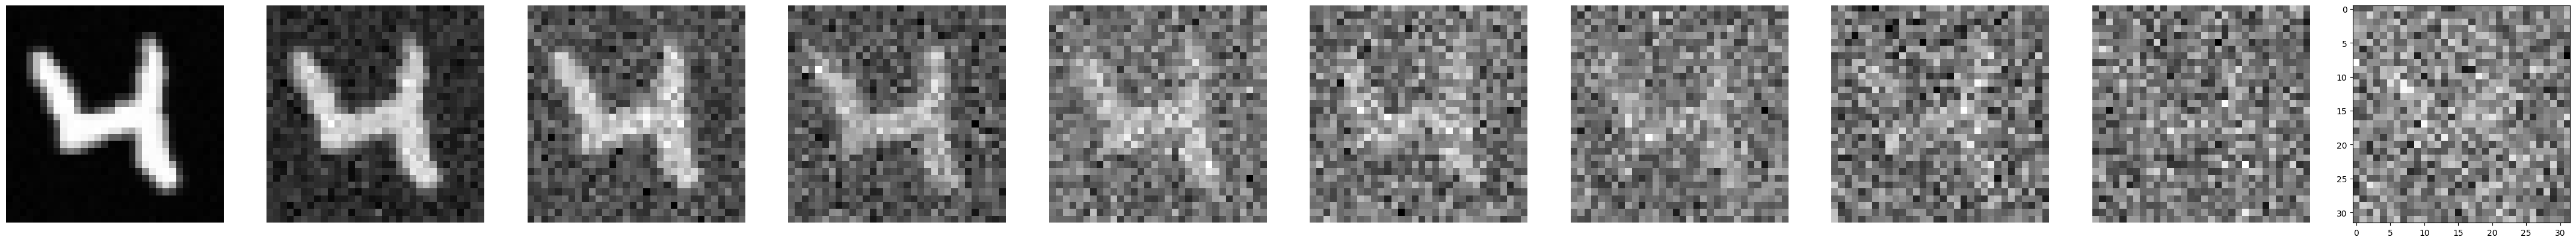

In [17]:
# No of time steps
T = 300
x0 = train_dataset[20][0]
plt.figure(figsize=(55,55))

print('Visualizing how noise changes the original image as time progresses using linear variance schedule')
samples = []
for i in range(T):
    num_images = 10
    step_size = int(T/num_images)
    x, _ = forward_diffusion(x0, torch.tensor(i).view(1,-1))
    samples.append(x)
    if i % step_size == 0:
        plt.axis('off')
        plt.subplot(1, num_images, int(i//step_size+1))
        plt.imshow(x.detach().cpu().numpy().reshape(32,32), cmap='gray')

## UNet Model

A simple Unet is trained to predict the noise added to image(s) at a timestep `t`. A Unet architecture is used since the dimensions of the input (image) and the output (noise) are the same.

The model parameters are shared across time to distinguish the noise added at each timestep `t`. Sinusoidal positional embeddings inspired by Transformer  are used to help the network know at what timestep `t` it is operating.

What is typically used here is very similar to that of an Autoencoder.Autoencoders have a "bottleneck" layer in between the encoder and decoder. The encoder first encodes an image into a smaller hidden representation called the "bottleneck", and the decoder then decodes that hidden representation back into an actual image. This forces the network to only keep the most important information in the bottleneck layer.

In terms of architecture, the DDPM authors went for a **U-Net**. This network, like any autoencoder, consists of a bottleneck in the middle that makes sure the network learns only the most important information. Importantly, it introduced residual connections between the encoder and decoder.
<p align="center">
    <img src="https://drive.google.com/uc?id=1_Hej_VTgdUWGsxxIuyZACCGjpbCGIUi6" width="570" />
</p>

As can be seen, a U-Net model first downsamples the input (i.e. makes the input smaller in terms of spatial resolution), after which upsampling is performed.

Below, we implement this network, step-by-step.

#### Step 2: The reverse diffusion process = UNet

<br>
<p align="center">
    <img src="https://theaisummer.com/static/9bb372bb74034360fe7891d546e3c5b4/01dae/reverse-diffusion.png" width="570" />
</p>
<br>



**Sinusoidal Position embeddings**

As the parameters of the neural network are shared across time (noise level) which means it can't distinguish between the different time steps, that means it needs to filter out the noise from images with very different noise intensities, for this the authors employ sinusoidal position embeddings to encode $t$, inspired by the Transformer model they are a clever way to encode discrete positional information like sequence steps. This makes the neural network "know" at which particular time step (noise level) it is operating, for every image in a batch.

But the amount of noise present in the input is dependent on the timestep. This means that passing the timestep into the model is a logical step. In every residual block, we insert a time embedding (obtained from passing the timestep into a Sinusoidal Positional Embedding function). This embedding encodes the time into a higher dimension which can be added to the residual block.

The SinusoidalPositionEmbeddings module takes a tensor of shape (batch_size, 1) as input (i.e. the noise levels of several noisy images in a batch), and turns this into a tensor of shape (batch_size, dim), with dim being the dimensionality of the position embeddings. This is then added to each residual block, as we will see further.

In [18]:
def positional_encodings(t, dim):
    """
    To enable the model to learn the noise added at each timestep,
    a positional encoding along with the input is fed as input

    Reference - https://huggingface.co/blog/annotated-diffusion#position-embeddings

    :params t: time steps - a tensor
    :params dim: encodings dimension - a number (int)

    Returns embeddings - shape(len(t), dim)
    """
    half_dim = dim // 2
    embeddings = math.log(10000) / (half_dim)
    embeddings = torch.exp(torch.arange(half_dim) * -embeddings)
    embeddings = t[:, None] * embeddings[None, :].to(device)
    # Embeddings are calculated using sine and cosine functions for a specific embedding size defined by dim in this case
    embeddings = torch.cat((embeddings.sin(), embeddings.cos()), dim=-1)
    # For alternating sine and cosine embeddings
    # Ref - https://stackoverflow.com/questions/71628542/how-to-alternatively-concatenate-pytorch-tensors
    embeddings = embeddings.T.flatten()
    embeddings = torch.stack(torch.split(embeddings, len(t)), dim=1).reshape(len(t),-1)

    return embeddings # Returns a vector that describes the position of an index in a list

In the below class we define the convolutional blocks of the UNet Model

In [19]:
class Block(nn.ModuleDict):
    def __init__(self, in_ch, out_ch, time_emb_dim, up=False):
        super(Block, self).__init__()
        self.time_mlp = nn.Linear(time_emb_dim, out_ch)
        if up: # Upsampling (Decoder)
            self.conv2d1 = nn.Conv2d(2*in_ch, out_ch, 3, padding=1) # Same size, half the no. of channels
            self.conv2d2 = nn.ConvTranspose2d(out_ch, out_ch, 4, 2, 1) # Double size, same no. of channels
            self.conv2dl = nn.Conv2d(out_ch, out_ch, 3, padding=1) # Same size, same no. of channels
        else: # Downsampling (Encoder)
            self.conv2d1 = nn.Conv2d(in_ch, out_ch, 3, padding=1) # Same size, double the no. of channels
            self.conv2d2 = nn.Conv2d(out_ch, out_ch, 3, padding=1) # Same size, same no. of channels
            self.conv2dl = nn.Conv2d(out_ch, out_ch, 4, 2, 1) # Half size, same no. of channels
        self.relu = torch.nn.ReLU()
        self.conv2d3 = torch.nn.Conv2d(out_ch, out_ch, 3, padding=1) # Same size, same no. of channels
        self.conv2d4 = torch.nn.Conv2d(out_ch, out_ch, 3, padding=1) # Same size, same no. of channels
        self.bnorm1 = nn.BatchNorm2d(out_ch)
        self.bnorm2 = nn.BatchNorm2d(out_ch)

    def forward(self, x, t):
        """
        Block performs a series of convolutions that increase/decrease
        the spatial dimension and the number of channels in both
        downsampling (Encoder) and upsampling (Decoder) stages

        :params x: input
        :params t: time embeddings
        """
        c1 = self.bnorm1(self.relu(self.conv2d1(x)))

        # Time embedding - 2D
        t_emb = self.relu(self.time_mlp(t)) # shape(batch_size, out_ch)

        # Extend time embedding to 4D like x
        t_emb = t_emb.unsqueeze(2).unsqueeze(3) # shape(batch_size, out_ch, 1, 1)

        c2 = self.relu(self.conv2d2(c1)) # shape(batch_size, out_ch, size, size)

        # Add time embedding to up-convolved input
        c2 = c2 + t_emb # shape(batch_size, out_ch, size, size)

        c3 = self.bnorm2(self.relu(self.conv2d3(c2)))
        c4 = self.relu(self.conv2d4(c3))
        cl = self.conv2dl(c4)

        return cl

Defining the Encoder class

In [20]:
class Encoder(nn.Module):
    def __init__(self, channels=(64, 128, 256, 512, 1024), time_emb_dim=32):
        super(Encoder, self).__init__()
        self.encoder_blocks = nn.ModuleList([Block(channels[c], channels[c+1],
                                                   time_emb_dim) for c in range(len(channels)-1)])

    def forward(self, x, t):
        """
        Encoder doubles the number of channels in the first convolution,
        followed by a series of convolutions that neither change size nor no. of channels,
        halves the input size (spatial dimension) at the final convolution
        and saves the outputs to concatenate during upsampling.
        It is repeated until the number of channels reaches max. no. of channels

        :params x: input, shape(batch_size, enc[0], original i/p size, original i/p size)
        :params t: time embeddings, shape(batch_size, self.tim_dim)

        Returns output, shape(batch_size, enc[-1], size/len(enc), size/len(enc)) and a list of encoder o/ps
        """
        enc_ops = []
        for b, block in enumerate(self.encoder_blocks):
            x = block(x, t)
            enc_ops.append(x) # Save encoder o/p

        return x, enc_ops

Defining the Decoder class

In [21]:
class Decoder(nn.Module):
    def __init__(self, channels=(1024, 512, 256, 128, 64), time_emb_dim=32):
        super(Decoder, self).__init__()
        self.channels = channels
        self.decoder_blocks = nn.ModuleList([Block(channels[i], channels[i+1],
                                                   time_emb_dim, up=True) for i in range(len(channels)-1)])

    def forward(self, x, enc_ops, t):
        """
        Decoder halves the number of channels in the first convolution step,
        doubles the input size in the second convolution step,
        followed by a series of convolutions that neither change size nor no. of channels.
        It is repeated until the number of channels reaches min. no. of channels

        :params x: final encoder output, shape(batch_size, enc[-1], size/len(enc), size/len(enc))
        :params enc_ops: list of encoder outputs
        :params t: time embeddings, shape(batch_size, self.tim_dim)

        Returns output, shape(batch_size, dec[-1], original i/p size, original i/p size)
        """
        for i in range(len(self.channels)-1):
            enc = enc_ops[i]
            x = torch.cat((enc, x), 1) # Concatenate encoder o/p (on channels dim, so doubles the no. of channels)
            x = self.decoder_blocks[i](x, t)

        return x

UNet Model

In [22]:
class Unet(nn.Module):
    def __init__(self):
        super(Unet, self).__init__()
        enc_ch=(64, 128, 256, 512, 1024) # Encoder channels
        dec_ch=(1024, 512, 256, 128, 64) # Decoder channels
        image_channels = 1 # Number of i/p channels
        self.tim_dim = 256 # time embedding dimension

        # Time embedding
        self.time_mlp = nn.Sequential(
                                      nn.Linear(self.tim_dim, self.tim_dim),
                                      nn.ReLU()
                                      )

        self.conv0 = nn.Conv2d(image_channels, enc_ch[0], 3, padding=1) # 3 channels to enc[0] channels
        self.encoder = Encoder(channels=enc_ch, time_emb_dim=self.tim_dim)
        self.decoder = Decoder(channels=dec_ch, time_emb_dim=self.tim_dim)
        self.conv1 = nn.Conv2d(dec_ch[-1], image_channels, 3, padding=1) # dec[-1] channels to 3 channels

    def forward(self, x, timestep):
        """
        Initial convolution - 3 channels to enc[0] channels,
        followed by encoder and decoder operations and
        final convolution - dec[-1] channels to 3 channels

        :params x: images at specific time steps, with(t=1toT)/without(t=0) noise added,
                   shape(batch_size, channels, img_size, img_size)
        :params timestep: a tensor of time steps, shape(batch_size)

        Returns noise (predicted) at specific timesteps shape(x)
        """
        # Time embeddings
        t = positional_encodings(timestep, self.tim_dim)

        t = self.time_mlp(t) # shape(batch_size, self.tim_dim)

        # Initial convolution
        x = self.conv0(x)

        # Encoder / down-sampling
        res, enc_ops = self.encoder(x, t)

        # Decoder / Up-sampling
        out = self.decoder(res, enc_ops[::-1], t)

        # Final convolution - Set output channels to desired number
        out = self.conv1(out)

        return out # shape(x)

In [23]:
# Create the instance for the model
unet = Unet()
print("Num params: ", sum(p.numel() for p in unet.parameters()))

Num params:  94488129


#### Create an instance for the model

In [24]:
unet = Unet().to(device)
print(unet)

Unet(
  (time_mlp): Sequential(
    (0): Linear(in_features=256, out_features=256, bias=True)
    (1): ReLU()
  )
  (conv0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (encoder): Encoder(
    (encoder_blocks): ModuleList(
      (0): Block(
        (time_mlp): Linear(in_features=256, out_features=128, bias=True)
        (conv2d1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv2d2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv2dl): Conv2d(128, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
        (relu): ReLU()
        (conv2d3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv2d4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (bnorm1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (bnorm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )



**Further improvements to the model can be implemented:**
- By adding Residual connections
- Different activation functions like SiLU, GWLU, ...
- GroupNormalization
- Attention


In [25]:
# Function to save the model and the optimizer
# def save_model(model, optimizer):
#     """
#     Function to save the trained model to disk.
#     """
#     print(f"Saving final model...")
#     torch.save({
#                 'model_state_dict': model.state_dict(),
#                 'optimizer_state_dict': optimizer.state_dict(),
#                 }, 'outputs/final_model.pth')

## Training the model


Here, \\(\mathbf{x}_0\\) is the initial (real, uncorruped) image, and we see the direct noise level \\(t\\) sample given by the fixed forward process. \\(\mathbf{\epsilon}\\) is the pure noise sampled at time step \\(t\\), and \\(\mathbf{\epsilon}_\theta (\mathbf{x}_t, t)\\) is our neural network. The neural network is optimized using a simple mean squared error (MSE) between the true and the predicted Gaussian noise.

The training algorithm now looks as follows:


<p align="center">
    <img src="https://drive.google.com/uc?id=1LJsdkZ3i1J32lmi9ONMqKFg5LMtpSfT4" width="400" />
</p>

In other words:
* we take a random sample $\mathbf{x}_0$ from the real unknown and possibily complex data distribution $q(\mathbf{x}_0)$
* we sample a noise level $t$ uniformally between $1$ and $T$ (i.e., a random time step)
* we sample some noise from a Gaussian distribution and corrupt the input by this noise at level $t$ using the nice property defined above
* the neural network is trained to predict this noise based on the corruped image $\mathbf{x}_t$, i.e. noise applied on $\mathbf{x}_0$ based on known schedule $\beta_t$



In [26]:
# Learning rate
LR = 1e-4

# Adam Optimizer
optimizer = torch.optim.Adam(unet.parameters(), lr=LR)

In [27]:
EPOCHS = 1
T = 1000
print(T)
for epoch in range(EPOCHS):
    # Iterate though the train loader
    for step, batch in enumerate(data_loader):

        # Zero out the gradients
        optimizer.zero_grad()

        # sample t uniformally for every example in the batch
        t = torch.randint(0, T, (BATCH_SIZE,), device=device).long().to(device)

        # Forward Diffusion
        x_noisy , true_noise = forward_diffusion(batch[0].to(device), t)

        # Backward Diffusion
        predicted_noise = unet(x_noisy.to(device), t)

        # Compute the loss
        # loss function: While large models tend to use mean squared error (MSE) loss,
        # MSE loss generates more diverse samples while MAE loss leads to smoother images
        loss = F.l1_loss(predicted_noise, true_noise)

        # Backpropagation
        loss.backward()

        # Update the weights
        optimizer.step()

        if epoch % 1 == 0 and step == 0:
            print(f"Epoch {epoch} | step {step:03d} Loss: {loss.item()} ")

1000
Epoch 0 | step 000 Loss: 0.8043689131736755 


KeyboardInterrupt: ignored

### Sampling



Without adding @torch.no_grad() we quickly run out of memory, because pytorch tracks all the previous images for gradient calculation
Because we pre-calculated the noise variances for the forward pass, we also have to use them when we sequentially perform the backward process.

<center>
<img src="https://drive.google.com/uc?id=1ij80f8TNBDzpKtqHjk_sh8o5aby3lmD7" width="500" />
</center>

Generating new images from a diffusion model happens by reversing the diffusion process: we start from $T$, where we sample pure noise from a Gaussian distribution, and then use our neural network to gradually denoise it (using the conditional probability it has learned), until we end up at time step $t=0$. As shown above, we can derive a slighly less denoised image $x_{t−1}$ by plugging in the reparametrization of the mean, using our noise predictor. Remember that the variance is known ahead of time.

Ideally, we end up with an image that looks like it came from the real data distribution or close to it.

In [28]:
@torch.no_grad()
def sampling(x_t, t, unet):
    """
    Uses trained model to gradually denoise the noisy image (at t) and
    recover image (at t-1)

    :params xt: noisy image at timestep t # shape(batch_size, channels, img_size, img_size)
    :params t: timesteps, a tensor # shape(batchsize)
    :params unet: Trained model
    :params schedule: Variance schedule

    Returns image at timestep t-1
    """
    noise = torch.randn_like(x_t)

    beta = linear_variance_schedule(T)
    alpha = 1 - beta
    alpha_bar = torch.cumprod(alpha, 0)
    alpha_bar_prev = torch.cat([torch.tensor([1]).cuda(), alpha_bar[:-1]], 0) # concat 1 in the beginning to match size
    sqrt_one_minus_alpha_bar = torch.sqrt(1 - alpha_bar)

    # calculations for posterior p(x_{t-1} | x_t, x_0)
    variance = ((1 - alpha_bar_prev) / (1 - alpha_bar)) * beta

    # Call model (current image - noise prediction)
    mean = (1 / torch.sqrt(alpha[t])) * (x_t - (beta[t]/sqrt_one_minus_alpha_bar[t]) * unet(x_t, t))

    if t[0] == 0:
        return mean
    else:
        x_prev = mean + torch.sqrt(variance[t]) * noise
        return x_prev

### Loading a checkpoint

**Note** The UNet model on MNIST dataset is already trained for 40 epochs and saved the checkpoint of the model and now we are loading the saved checkpoint file from that file load the model and optimizer. The training time of the unet model is little huge.


In [29]:
# Function to load the downloaded checkpoint file path
def load_ckp(checkpoint_fpath, model, optimizer):
    checkpoint = torch.load(checkpoint_fpath) # Load the saved or downloaded checkpoint
    model.load_state_dict(checkpoint["model_state_dict"])
    optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
    return model, optimizer

The above function reads the checkpoint file and loads the downloaded or saved model state and optimizer state to an instance of model and optimizer. Loading a state essentially means is that it sets the model/optimizer parameters to the values as present in the saved checkpoint.

In [30]:
# Loading the checkpoint path here
ckp_path = "/content/mnist_model.pth"

# Call the load checkpoint function by passing the file path
# Basically, you first initialize your model and optimizer and then update the state dictionaries using the load checkpoint function.
unet, optimizer = load_ckp(ckp_path, unet, optimizer)

### Visualize reverse diffusion process

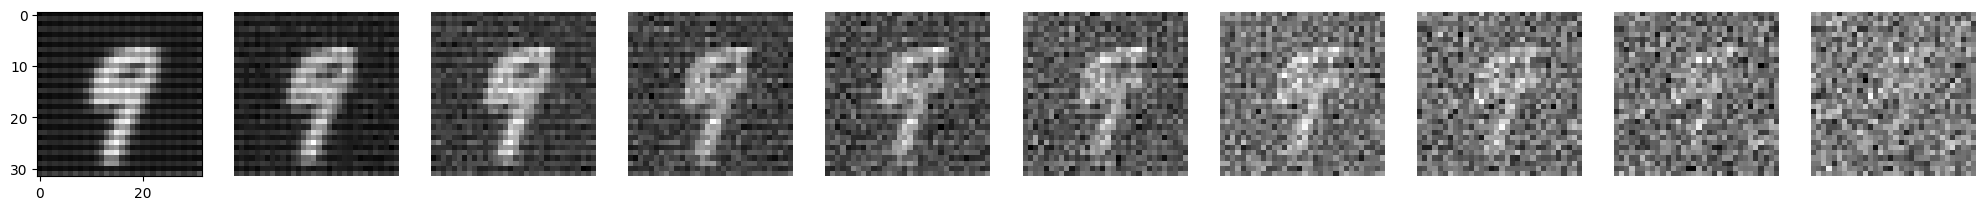

In [31]:
T = 300
x_t = torch.randn(1, 1, IMG_SIZE, IMG_SIZE).to(device)
plt.figure(figsize=(25, 25))
num_images = 10
stepsize = int(T//num_images)

for t in range(T-1, -1, -1):
    t = torch.full((1,), t, device=device, dtype=torch.long)
    # Call the sampling function to visualize the denoised image from t-1 time steps
    x_t = sampling(x_t, t, unet)
    if t % stepsize == 0:
        plt.axis('off')
        plt.subplot(1, num_images, int(torch.div(t, stepsize, rounding_mode='trunc'))+1)
        plt.imshow(x_t[0,0].detach().cpu().numpy(), cmap='gray')

### Please answer the questions below to complete the experiment:




In [34]:
#@title Q.1. A diffusion probabilistic model (diffusion model) is a parameterized Markov chain trained using variational inference to produce samples matching the data after finite time.
Answer1 = "TRUE" #@param ["","TRUE", "FALSE"]


#### Consider the following statements about Diffusion Models and answer Q2.


A. Diffusion models aim to decompose the image generation process (sampling) in many small “denoising” steps.

B. The forward diffusion process takes the input image and gradually adds gaussian noise to it through a series of 'T' time steps according to a variance schedule.

C. In the reverse process, a neural network (U-Net) is trained to recover the original image from the gaussian noise by gradually removing the predicted noise at each time step.

In [35]:
#@title Q.2. Which of the above statements is/are True for Diffusion Models?
Answer2 = "A, B and C" #@param ["","Only A", "Only C", "Only A and B", "Only B and C", "Only A and C", "A, B and C"]


In [36]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [37]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "None" #@param {type:"string"}


In [38]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [39]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [40]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [41]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 2956
Date of submission:  16 Oct 2023
Time of submission:  00:34:41
View your submissions: https://dlfa-iisc.talentsprint.com/notebook_submissions
